# Overview

This week we'll talk about some of the charachteristics of real-world social networks. The structure is the following: 

* Part 1: A crash course on real-world social networks.
* Part 2: Visualizing the network of Redditors
* Part 3: Properties of the real-world network of Redditors


> *Reading*: Read [Chapter 3 of the Network Science book.](http://networksciencebook.com/chapter/3). The most important sections are 3.1 to 3.4 and 3.8 to 3.10, so focus on that.

# Part 1 : Empirical properties of real-world social networks

Researchers in Computational Social Science have widely studied the properties of real-world social networks. The very cool thing they found is that many widely different social networks (from face-to-face interactions among classmates, to the Facebook network, to collaboration networks among scientists, etc) present some commonalities. We refer to those as 'Universalities'.
In the video-lecture below, I will introduce _some_ of the things we know to be true for most real-world social networks. 

>> **_Video Lecture_**. Start by watching the ["Properties of empirical social networks"](https://youtu.be/jHdnehLku54). 


In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo("jHdnehLku54",width=800, height=450)

> *Exercise 1:* Did you really read the text? Answer the following questions (no calculations needed) in your Jupyter notebook.

> * What's the problem with random networks as a model for real-world networks according to the argument in section 3.5 (near the end)?

> * List the four regimes that characterize random networks as a function of ⟨k⟩.

> * According to the book, why is it a problem for random networks (in terms of being a model for real-world networks that the degree-dependent clustering C(k) decreases as a function of k in real-world networks?

In [ ]:
"""
1. That real world networks are in fact *not* random, with a clear (and undefined) underlying order to them. 
2. The four regimes that caracterize the random netowrks as a function of (k) are subcritical (k<1), transition (k=1), supercritical (k>1) and fully connected (k> ln(N)).
3. In summary, we find that the random network model does not capture the clustering of real networks. Instead real networks have a much higher clustering coefficient than expected for a random network of similar N and L. 
"""

# Part 2 : Visualizing the network of Redditors

Take the network of redditors you built in Week3, Part 3. To get an idea about how the network looks like, we start visualizing it. For this exercise, we will use the __awesome library [``netwulf``](https://netwulf.readthedocs.io/en/latest/index.html)__ created by Ulf Aslak, a colleague of mine and former DTU PhD student. You can install it via ``pip install netwulf``. 

Netwulf is built on top of [d3-force](https://github.com/d3/d3-force), a Javascript library that simulates the dynamics of particles moving in 2D. In the visualization, particles correspond to network nodes subject to forces:
 * Nodes are attracted to the center of the viz 
 * Nodes repel each other
 * Nodes linked by an edge will preferably stay at a fixed distance to each other.


> _Exercise_ 1: Visualize the network of Redditors. 
>
> * For this and the following exercise, we will study the undirected graph of "reciprocal" edges. Reciprocal edges are such that each of the two authors forming the edge has replied to the other at least once. Build the reciprocal graph using the function [``to_undirected``](https://networkx.org/documentation/stable//reference/classes/generated/networkx.DiGraph.to_undirected.html)(set ``reciprocal=True``). Assign to each undirected edge a weight equal to the sum of the weights in the two corresponding directed edges. Remove self-loops (edges connecting a node to itself). Remove from the network all the nodes without connections. 
> * How many nodes are present in the reciprocal graph? How many edges? Which fraction of the original network nodes and edges they represent? How do you interpret this result?
> * Visualize the undirected graph you just created using the function [``visualize``](https://netwulf.readthedocs.io/en/latest/reference/interactive.html?highlight=visualize#netwulf.interactive.visualize) of the Netwulf package. 
> * Play with the parameters of the netwulf algorithm to obtain a visualization you like. To understand better what the parameters mean, have a look at the [documentation](https://netwulf.readthedocs.io/en/latest/visualization/init.html?). Your visualization may look similar to the one below, where I made the size of nodes proportional to their strength (sum of weights on the outgoing edges), and I added the names of the top redditors by degree... But not necessarily! Just have fun making your own version. You can save the figure directly from the interactive visualization panel, or plot it in higher resolution in matplotlib following [this example](https://netwulf.readthedocs.io/en/latest/cookbook/cookbook.html#save-as-pdf).
> * Describe the structure you observe. Can you identify nodes with a privileged position in the network? 
> * _Optional_: You can color nodes based on a property of your interest. For example, I colored nodes based on the date of authors' first comment, following [this example](https://github.com/benmaier/netwulf/issues/38). What do you observe? Can you find specific nodes properties that seem to correlate with a node's position in the network?

In [ ]:
#<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/network.png" alt="Drawing" style="width: 800px;"/>

In [ ]:
import netwulf as nf
import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats 
from operator import itemgetter 

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def setup_mpl():
    #mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 200
    #mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

In [ ]:
"""
This cell and the one below load the data from .pkl file, finds the parent_authors and creates the network using networkX in accordance to week 3 exercises.
The remaining cells answer the given questions.
"""

# Load data
wsb_comments = pd.read_pickle('data/comments.pkl')
wsb_submissions = pd.read_pickle('data/posts.pkl')

# Create dictionaries
parent = dict(zip(wsb_comments['id'], wsb_comments['parent_id']))
comment_authors = dict(zip(wsb_comments['id'], wsb_comments['author']))
submission_authors = dict(zip(wsb_submissions['id'], wsb_submissions['author']))

# Define function for getting parent author
def parent_author(comment_id):
    parent_id = parent[comment_id]

    if parent_id[:3] == 't1_':
        try:
            return comment_authors[parent_id[3:]]
        except:
            pass
    else:
        try:
            return submission_authors[parent_id[3:]]
        except:
            pass

# Add empty column to comments dataframe
wsb_comments['parent_author'] = ""

# For every comment id to add the parent_author
wsb_comments['parent_author'] = wsb_comments.id.apply(parent_author)

# Filter dataframe, only keepinbg posts before Dec 31st, 2020 with actual parent_author names
wsb_comments_filtered = wsb_comments.loc[wsb_comments['created_utc'] <= '2020-12-31']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['author'] != '[deleted]']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['author'].notnull()]
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['parent_author'] != '[deleted]']
wsb_comments_filtered = wsb_comments_filtered[wsb_comments_filtered['parent_author'].notnull()]

# Create weighted edge list
edge_list = wsb_comments_filtered.groupby(['author', 'parent_author']).size().to_frame('weight').reset_index()

# Define nodes and weights
sources = list(edge_list['author'])
targets = list(edge_list['parent_author'])
weights = list(edge_list['weight'])

# Create tuple list of edges with weights
edges = [(sources[i], targets[i], weights[i]) for i in range(len(sources))]

# Create graph and add nodes and edges
wsb_graph = nx.DiGraph()
wsb_graph.add_nodes_from(sources)
wsb_graph.add_nodes_from(targets)
wsb_graph.add_weighted_edges_from(edges)


In [ ]:
### For this and the following exercise, we will study the undirected graph of "reciprocal" edges. Reciprocal edges are such that each of the two authors forming the edge has replied to the other at least once. Build the reciprocal graph using the function to_undirected(set reciprocal=True). Assign to each undirected edge a weight equal to the sum of the weights in the two corresponding directed edges. Remove self-loops (edges connecting a node to itself). Remove from the network all the nodes without connections.

# Create undirected
wsb_graph_reciprocal = wsb_graph.to_undirected(reciprocal=True)

# Remove self-loops and nodes without edges
wsb_graph_reciprocal.remove_edges_from(nx.selfloop_edges(wsb_graph_reciprocal))
wsb_graph_reciprocal.remove_nodes_from(list(nx.isolates(wsb_graph_reciprocal)))

print(wsb_graph.get_edge_data('coldiron03', 'wallstreet_cfa'))
print(wsb_graph.get_edge_data('wallstreet_cfa', 'coldiron03'))
print(wsb_graph_reciprocal.get_edge_data('coldiron03', 'wallstreet_cfa'))
print(wsb_graph_reciprocal.get_edge_data('wallstreet_cfa', 'coldiron03'))
print("")

# Get correct weights
for (u, v, wt) in wsb_graph_reciprocal.edges.data('weight'):
    w1 = wsb_graph[u][v]['weight']
    w2 = wsb_graph[v][u]['weight']
    wsb_graph_reciprocal[u][v]['weight'] = w1 + w2


print(wsb_graph.get_edge_data('coldiron03', 'wallstreet_cfa'))
print(wsb_graph.get_edge_data('wallstreet_cfa', 'coldiron03'))
print(wsb_graph_reciprocal.get_edge_data('coldiron03', 'wallstreet_cfa'))
print(wsb_graph_reciprocal.get_edge_data('wallstreet_cfa', 'coldiron03'))

In [ ]:
### How many nodes are present in the reciprocal graph? How many edges? Which fraction of the original network nodes and edges they represent? How do you interpret this result?

print("Directed graph has {0} nodes and {1} edges.".format(wsb_graph.number_of_nodes(), wsb_graph.number_of_edges()))
print("")
print("Reciprocal undirected graph has {0} nodes and {1} edges.".format(wsb_graph_reciprocal.number_of_nodes(), wsb_graph_reciprocal.number_of_edges()))
print("")
print("Node proportion is {0} for nodes and {1} for edges".format((wsb_graph_reciprocal.number_of_nodes()/wsb_graph.number_of_nodes()), (wsb_graph_reciprocal.number_of_edges()/wsb_graph.number_of_edges())))

"""Around a third of active redditors have made reciprocal interactions, which seems like alot but reasonable I guess.
The amount of 
"""

In [ ]:
### Visualize the undirected graph you just created using the function visualize of the Netwulf package.
nf.visualize(wsb_graph_reciprocal)

In [ ]:
# ### Play with the parameters of the netwulf algorithm to obtain a visualization you like. To understand better what the parameters mean, have a look at the documentation. Your visualization may look similar to the one below, where I made the size of nodes proportional to their strength (sum of weights on the outgoing edges), and I added the names of the top redditors by degree... But not necessarily! Just have fun making your own version. You can save the figure directly from the interactive visualization panel, or plot it in higher resolution in matplotlib following this example.

# {
#   "preset": "Default",
#   "closed": false,
#   "remembered": {
#     "Default": {
#       "0": {
#         "zoom": 0.7,
#         "node_charge": -45,
#         "node_gravity": 0.2821724216012764,
#         "link_distance": 5.043069077260426,
#         "link_distance_variation": 0,
#         "node_collision": true,
#         "wiggle_nodes": false,
#         "freeze_nodes": true,
#         "node_fill_color": "#16b8f3",
#         "node_stroke_color": "#555555",
#         "node_label_color": "#000000",
#         "node_size": 30,
#         "node_stroke_width": 1,
#         "node_size_variation": 0.5,
#         "display_node_labels": false,
#         "scale_node_size_by_strength": true,
#         "link_color": "#949c3e",
#         "link_width": 2,
#         "link_alpha": 0.5,
#         "link_width_variation": 0.5,
#         "display_singleton_nodes": true,
#         "min_link_weight_percentile": 0,
#         "max_link_weight_percentile": 1
#       }
#     }
#   },
#   "folders": {
#     "Input/output": {
#       "preset": "Default",
#       "closed": false,
#       "folders": {}
#     },
#     "Physics": {
#       "preset": "Default",
#       "closed": false,
#       "folders": {}
#     },
#     "Nodes": {
#       "preset": "Default",
#       "closed": false,
#       "folders": {}
#     },
#     "Links": {
#       "preset": "Default",
#       "closed": false,
#       "folders": {}
#     },
#     "Thresholding": {
#       "preset": "Default",
#       "closed": false,
#       "folders": {}
#     }
#   }
# }

In [ ]:
### Describe the structure you observe. Can you identify nodes with a privileged position in the network?
"""It seems that some of the big players are centered on the network while others are further from the middle, yet have similar size. 
I believe this indicates they are less connected generally than the ones who are centered.
Also, DFV is not very centered.."""

In [ ]:
### _Optional_: You can color nodes based on a property of your interest. For example, I colored nodes based on the date of authors' first comment, following [this example](https://github.com/benmaier/netwulf/issues/38). What do you observe? Can you find specific nodes properties that seem to correlate with a node's position in the network?

# Part 3: Properties of the real-world network of Redditors


> _Exercise 2_: 
>
> 2.1 _Random Network_: In this exercise we will create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
> * Use NetworkX to create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. You can use the function [``erdos_renyi_graph``](https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.erdos_renyi_graph.html#networkx.generators.random_graphs.erdos_renyi_graph) in NetworkX. 
> * Visualize the network as you did for the Redditors network in the exercise above (my version is below). Comment on the differences between the two.
>
> 2.2 _Degree Distribution_: In this exercise, we will compare the degree distribution of the real network and its random counterpart.
> * Compute the distribution of degree for the random network using the numpy function ``np.histogram``. Bin your histogram using 10 linearly spaced bins. Remember to pass the parameter ``density=True``.
> * Compute the distribution of degree for the Redditors undirected network using the numpy function ``np.histogram``. Bin your histogram using 10 logarithmically spaced bins. Remember to pass the parameter ``density=True``.
> * Plot the two distributions you computed in steps 1. and 2. in the same figure as two line-graphs. Log-scale the x and y axes. 
> * Comment the figure. What are the differences between the two distributions? Why did I ask you to use two different types of binning? 
> * What is the average degree of the random and the real network? Comment on the relation between the two. 
>
> 2.3 _Shortest Paths_: Here, we will check if the Redditors Network is a small-world Network.
> * Compute the average shortest path for the largest connected component of the Redditors network (for a reminder of the definition of connected components, check [section 2.9 of the Network Science book](http://networksciencebook.com/chapter/2#connectedness)). You can use the following steps: 
>    * Use [``nx.algorithms.connected_components``](https://networkx.org/documentation/stable//reference/algorithms/generated/networkx.algorithms.components.connected_components.html) to find all connected components (it returns a list of subsets of the original set of nodes). 
>    * Consider the largest subset of nodes found in the step above. Build the subgraph of your original network containing those nodes exclusively, using [``nx.Graph.subgraph``](https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.subgraph.html). This corresponds to your largest connected component (a.k.a [giant component](https://en.wikipedia.org/wiki/Giant_component)).
> * Compute the average shortest path length of the giant component using [``nx.average_shortest_path_length``](https://networkx.org/documentation/networkx-1.3/reference/generated/networkx.average_shortest_path_length.html)
> * Compute the average shortest path length for the giant component of the random network you built in exercise 2.1.
> * Comment on the relation between the average shortest path length in the real and the random networks. Can you conclude that the small-world property apply to the Redditors network? 
>
> 2.4 _Clustering_: Here, we will compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using networkx [``clustering``](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html#networkx.algorithms.cluster.clustering) function. Compute the average across nodes. Is it consistent with the analytical prediction (network science book equation 3.21)?
> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [ ]:
#<img src="https://github.com/lalessan/comsocsci2021/raw/master/files/random_network.png" alt="Drawing" style="width: 800px;"/>

In [18]:
import networkx as nx
import netwulf as nf

In [19]:
### 2.1 Random Network: In this exercise we will create a Random Network as a null model to investigate some properties of the Redditors Network.

### Compute the value of p such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).
N = wsb_graph_reciprocal.number_of_nodes()
L = wsb_graph_reciprocal.number_of_edges()
p = L/((N*(N-1))/2)

### Use NetworkX to create a Random network with the same number of nodes as the redditor networks, and p as computed above. You can use the function erdos_renyi_graph in NetworkX.
random_graph = nx.erdos_renyi_graph(N, p)

# print(random_graph.number_of_nodes())
# print(random_graph.number_of_edges())


### Visualize the network as you did for the Redditors network in the exercise above (my version is below). Comment on the differences between the two.
nf.visualize(random_graph)


OSError: [Errno 98] Address already in use

In [20]:
import pandas as pd
import numpy as np
import networkx as nx
from scipy import stats 
from operator import itemgetter 
from collections import Counter

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def setup_mpl():
    #mpl.rcParams['font.family'] = 'Helvetica Neue'
    mpl.rcParams['font.size'] = 11
    mpl.rcParams['figure.figsize'] = (7,2.5)
    mpl.rcParams['figure.dpi'] = 200
    #mpl.rcParams['lines.linewidth'] = 1
setup_mpl()

Average degree for random netowrk is:  3.014518172074442
Average degree for wsb netowrk is:  2.991717821299815


'They have the same average, which makes sense as the random network is generated from the distribution calculated from the wsb graph.'

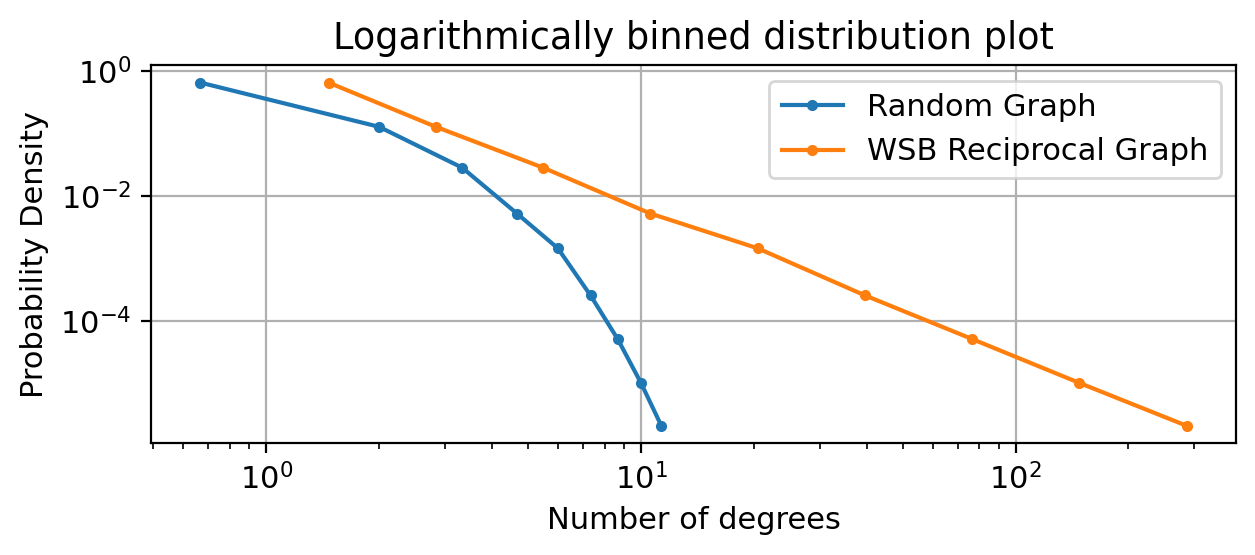

In [22]:
# # # 2.2 Degree Distribution: In this exercise, we will compare the degree distribution of the real network and its random counterpart.

random_degrees_dict = dict(random_graph.degree())
random_degrees = list(random_degrees_dict.values())

wsb_reciprocal_degrees_dict = dict(wsb_graph_reciprocal.degree())
wsb_reciprocal_degrees = list(wsb_reciprocal_degrees_dict.values())

# # # Compute the distribution of degree for the random network using the numpy function np.histogram. Bin your histogram using 10 linearly spaced bins. Remember to pass the parameter density=True.
# bins = np.logspace(np.log10(1), np.log10(max(random_degrees)), 10)
bins = np.linspace(0, max(random_degrees), 10)
hist, edges = np.histogram(random_degrees, bins=bins, density=True)
x_random = (edges[1:]+edges[:-1])/2.


# # # Compute the distribution of degree for the Redditors undirected network using the numpy function np.histogram. Bin your histogram using 10 logarithmically spaced bins. Remember to pass the parameter density=True.
bins = np.logspace(np.log10(1), np.log10(max(wsb_reciprocal_degrees)), 10)
hist, edges = np.histogram(wsb_reciprocal_degrees, bins=bins, density=True)
x_wsb = (edges[1:]+edges[:-1])/2.

# # # Plot the two distributions you computed in steps 1. and 2. in the same figure as two line-graphs. Log-scale the x and y axes.

fig, ax = plt.subplots()
ax.plot(x_random, hist, marker='.', label='Random Graph')
ax.plot(x_wsb, hist, marker='.', label='WSB Reciprocal Graph')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Number of degrees')
ax.set_ylabel('Probability Density')
ax.set_title("Logarithmically binned distribution plot")
ax.grid()
ax.legend(loc='upper right')

# # # Comment the figure. What are the differences between the two distributions? Why did I ask you to use two different types of binning?
"""The number of edges on each node is binomially distributed, which means the relationship is *not* exponential, ie. the linear binning. 
We know that the number of edges in the reddit network is in fact exponential."""

# # # What is the average degree of the random and the real network? Comment on the relation between the two.
print("Average degree for random netowrk is: ", np.mean(random_degrees))
print("Average degree for wsb netowrk is: ", np.mean(wsb_reciprocal_degrees))
"""They have almost the same average, which makes sense as the random network is generated from the distribution calculated from the wsb graph."""


In [27]:
# # # 2.3 Shortest Paths: Here, we will check if the Redditors Network is a small-world Network.

# # # Compute the average shortest path for the largest connected component of the Redditors network (for a reminder of the definition of connected components, check section 2.9 of the Network Science book). You can use the following steps:
    # # # Use nx.algorithms.connected_components to find all connected components (it returns a list of subsets of the original set of nodes).
    # # # Consider the largest subset of nodes found in the step above. Build the subgraph of your original network containing those nodes exclusively, using nx.Graph.subgraph. This corresponds to your largest connected component (a.k.a giant component).
wsb_giant_connected = max(nx.connected_components(wsb_graph_reciprocal), key=len)
wsb_giant_connected = wsb_graph_reciprocal.subgraph(wsb_giant_connected)
# # # Compute the average shortest path length of the giant component using nx.average_shortest_path_length
wsb_giant_connected_avg = nx.average_shortest_path_length(wsb_giant_connected)

# # # Compute the average shortest path length for the giant component of the random network you built in exercise 2.1.

random_giant_connected = max(nx.connected_components(random_graph), key=len)
random_giant_connected = random_graph.subgraph(random_giant_connected)
random_giant_connected_avg = nx.average_shortest_path_length(random_giant_connected)


# # # Comment on the relation between the average shortest path length in the real and the random networks. Can you conclude that the small-world property apply to the Redditors network?

print("The average shortest path length for the giant connected component of wsb graph is: ", wsb_giant_connected_avg)
print("The average shortest path length for the giant connected component of random graph is: ", random_giant_connected_avg)


The average shortest path length for the giant connected component of wsb graph is:  5.010998012902765
The average shortest path length for the giant connected component of random graph is:  8.367643448229272


In [28]:
# # # 2.4 Clustering: Here, we will compare the clustering coefficient in the Redditors Network and its random counterpart.

# # # Compute the clustering coefficient for all nodes in the random network, using networkx clustering function. Compute the average across nodes. Is it consistent with the analytical prediction (network science book equation 3.21)?
random_avg_clustering = nx.average_clustering(random_graph)
print("Average clustering coefficient for random graph: ", random_avg_clustering)
# # # Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?
wsb_avg_clustering = nx.average_clustering(wsb_graph_reciprocal)
print("Average clustering coefficient for wsb graph: ", wsb_avg_clustering)


Average clustering coefficient for random graph:  2.319938011256339e-05
Average clustering coefficient for wsb graph:  0.01595906804366365
